# Research Question/Motivation
What is the correlation between average rating and salary for professors at Cal Poly?

Understanding this correlation can help in evaluating if higher ratings are associated with higher salaries, which could be indicative of rewarding quality teaching.

# Data Collection and Cleaning

## Data Collection
The data used in this study includes:
1. **Professors' Salary**: Collected from https://afd.calpoly.edu/payroll/compensation_report/state/.
2. **Professors' Rating**: Collected from PolyRatings (https://polyratings.dev/search/name).
3. **Professors' Position**: Collected from https://catalog.calpoly.edu/facultyandstaff/#facultystaffemeritustext

## Data Cleaning
Steps involved:
1. **Formatting DataFrames**: Format all dataframe in the same format.
2. **Removing and Combing Duplicate Values**: Removing duplicated professor names.
3. **Merging Datasets**: Combining salary and ratings data on professor names.
4. **Handling Missing Values**: Removing or imputing missing entries.

## Formatting DataFrames



In [ ]:
import pandas as pd

df_rating = pd.read_csv("ratings.csv")
df_salary = pd.read_csv("salaries.csv")
df_position = pd.read_csv("position.csv")
df_payPositionRating = pd.read_csv("payPositionRating.csv")

Rating Dataframe

In [ ]:
df_rating.head()

,lastName,firstName,department,numEvals,overallRating,materialClear,studentDifficulties,courses
0,Mahjoor,Parisa,CHEM,17,0.64,0.82,0.45,"['CHEM 110', 'CHEM 127', 'CHEM 316']"
1,Clark,Chris,CSC,12,3.70,3.62,3.70,"['CPE 103', 'CSC 103', 'CPE 123', 'CRP 430', '..."
2,LaGuire,Tiev,FSN,13,2.57,2.57,2.71,"['FSN 210', 'FSN 250', 'FSN 251']"
3,Lathrop,Amanda,FSN,8,2.22,2.67,1.89,"['FSN 125', 'FSN 275']"
4,Rucci,Nancy,SPAN,12,2.50,2.50,2.64,"['SPAN 101', 'SPAN 102', 'SPAN 111', 'SPAN 201..."


Salary Dataframe

In [ ]:
df_salary.head()

,name,avgPay
0,"Aagaard, Sofie J",91650.955000
1,"Abba, Michele M",57789.406667
2,"Abelli-Amen, Ella Carol",4778.250000
3,"Abeloos, Diego V.",67907.666667
4,"Abercromby, Kira Jorgensen",123885.333333


Position Dataframe


In [ ]:
df_position.head()

,name,year,dept,position,education
0,"Abercromby, Kira J.",2008,Aerospace Engineering,Professor,"B.S., University of California, Los Angeles, 1..."
1,"Abo Ismail, Mohammed",2019,Animal Science,Assistant Professor,"B.S., Alexandria University Damanhour, 2000; M..."
2,"Adams, Nikki L.",2002,Biological Sciences,Professor,"B.A., University of California, Santa Barbara,..."
3,"Adams, Aubrie S.",2017,Communication Studies,Associate Professor,"B.A., Sonoma State University, 2005; M.A., Sac..."
4,"Adams, Elizabeth",2023,Construction Management,Assistant Professor,"B.S., Boise State University, 2001; M.S., Univ..."


As we can see, professors in rating dataframe only have first and last names, while the other two sources includes middle name, first name, and last name in a single string, therefore the first step we want to do is to extract the first and last name of each professor from a name string by using split, and add it to the two dataframe as first and last name for later use.

# Removing and Combining Duplicate Values
In this step, we want to ensure that there is no duplicates in rating dataframe or the salary dataframe, since sometime different professors might have same first and last name, or the professor teaches two different department and was accidentally reported more than once.

Therefore, we check if there is duplicate names by putting the name in a set and found that there actually is multiple duplicates, and through meticulous research and background checks online, we have found out that most of the professors are the same but have more than one entry through various reasons, and some professor's data was simply irrelevant, therefore we dropped professors that are no longer teaching, combined and average out rating and salary for the professor that have more than one entries. Through these operations, all the duplicates are eliminated.

# Merging datasets
Now that all dataframes have first and last name, we can merge the three dataset on the first and last name, and now we will have a single unified dataframe that contains all the information.

# Handeling Missing Values
Now we are at the last step, since the professor position dataframe only have value indicating whether is a professor, while some "professor" teaches and have rating, but they are actually lecturer/TA, therefore we will fill those NA with lecturer/TA.

Now we have a complete dataframe that can be further used for analyzing and modeling.

In [ ]:
df_payPositionRating.head()

,name,avgPay,firstName,lastName,department,numEvals,courses,overallRating,materialClear,studentDifficulties,year,dept,position,education
0,"Abercromby, Kira Jorgensen",123885.33,Kira,Abercromby,AERO,20,"['AERO 353', 'AERO 451', 'AERO 101', 'AERO 452...",3.39,3.34,3.42,2008.0,Aerospace Engineering,Professor,"B.S., University of California, Los Angeles, 1..."
1,"Abney, Keith A",99122.78,Keith,Abney,PHIL,138,"['PHIL 125', 'PHIL 337', 'PHIL 124', 'PHIL 300...",2.31,2.61,2.05,NaN,NaN,Lecturer/TA,NaN
2,"Adams, Nikki L",116394.67,Nikki,Adams,BIO,27,"['BIO 405', 'MSC 440', 'BIO 160', 'ZOO 336', '...",2.82,2.68,2.75,2002.0,Biological Sciences,Professor,"B.A., University of California, Santa Barbara,..."
3,"Adan, Elizabeth",130039.99,Elizabeth,Adan,ART,37,"['ART 118', 'ART 311', 'WGS 210', 'ART 315', '...",3.56,3.66,3.48,2007.0,"Women's, Gender and Queer Studies, Interdiscip...",Professor and WGQS Department Chair,"B.A., University of California, Davis, 1993; M..."
4,"Agbo, Samuel O",85824.17,Samuel,Agbo,EE,80,"['EE 151', 'EE 347', 'EE 228', 'EE 307', 'EE 4...",1.23,1.28,1.01,1991.0,Electrical Engineering,Professor,"B.Sc., University of Nigeria, 1975; M.S.E., Un..."


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

#Data Exploration
If we plot every professor by rating and salary, we initially see a slight downwards trend. This would suggest that professors with higher ratings on PolyRating generally have lower salaries.

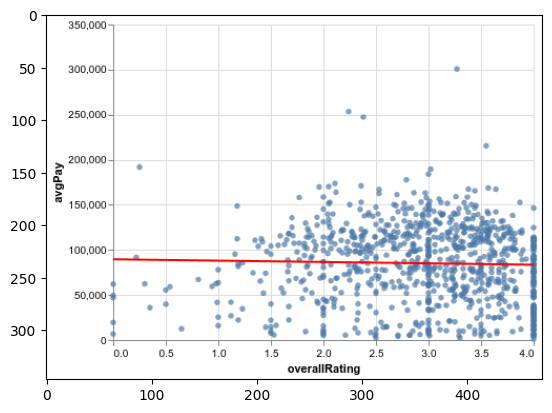

In [ ]:
plt.imshow(mpimg.imread("initial.png"))

To investigate this, we can split up professors by department.

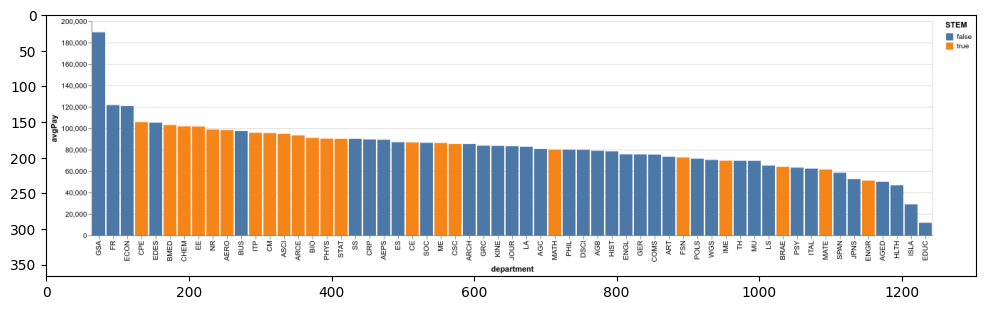

In [ ]:
plt.figure(figsize=(12, 8))
plt.imshow(mpimg.imread("pay.png"))

Here we can see that STEM departments (indicated in orange) typically have higher average salaries for their professors.

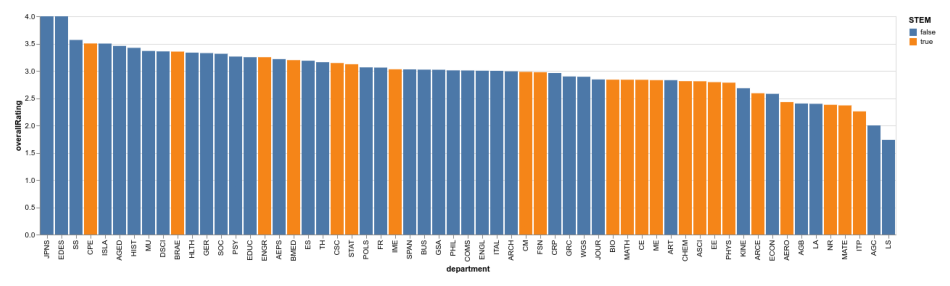

In [ ]:
plt.figure(figsize=(12, 8))
plt.axis("off")
plt.imshow(mpimg.imread("rating.png"))

STEM departments also have lower ratings on average. Because department is correlated with both rating and salary, it is a confounding variable between the two.

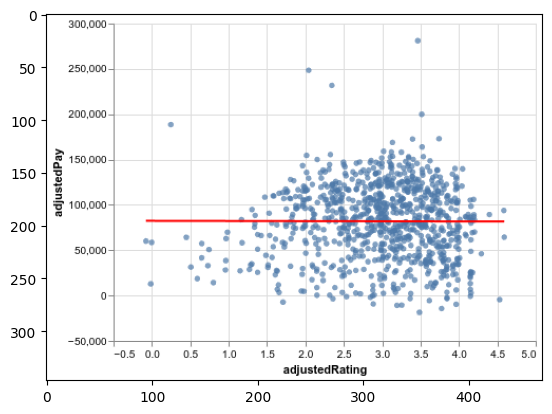

In [ ]:
plt.axis("off")
plt.imshow(mpimg.imread("adjusted.png"))

After we adjust for our confounding variable, our data is much ore centered. We can also see that there is no strong correlation between polyRating and salary overall.

# Machine Learning

In [ ]:
import pickle
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
df = pickle.load(open("df_cleaned.pkl", "rb"))
valuable = ["avgPay", "numEvals", "overallRating", "materialClear", "studentDifficulties", "year", "position", "education", "deptCleaned"]
df = df[valuable]
df["education"] = df["education"].fillna("")
df.head()

,avgPay,numEvals,overallRating,materialClear,studentDifficulties,year,position,education,deptCleaned
name_x,,,,,,,,,
"Abercromby, Kira Jorgensen",123885.33,20,3.39,3.34,3.42,2008.0,Professor,"B.S., University of California, Los Angeles, 1...",AERO
"Abney, Keith A",99122.78,138,2.31,2.61,2.05,2024.0,Lecturer/TA,,PHIL
"Adams, Nikki L",116394.67,27,2.82,2.68,2.75,2002.0,Professor,"B.A., University of California, Santa Barbara,...",BIO
"Adan, Elizabeth",130039.99,37,3.56,3.66,3.48,2007.0,Professor and WGQS Department Chair,"B.A., University of California, Davis, 1993; M...",ART
"Agbo, Samuel O",85824.17,80,1.23,1.28,1.01,1991.0,Professor,"B.Sc., University of Nigeria, 1975; M.S.E., Un...",EE


We chose to use tfidf for the education column to find similarities between education. Additionally, we used OneHotEncoding for the categorical variables position and department. Finally, we standardized everything with StandardScaler.

We decided to analyze a wide variety of models to determine which would have the best performance on our dataset, which you can see below.

In [ ]:
tfidf = TfidfVectorizer(max_features=60)
one_hot = OneHotEncoder()
scaler = StandardScaler()

models = [LinearRegression(), KNeighborsRegressor(), RandomForestRegressor(), SVR(), GradientBoostingRegressor(), Ridge(), Lasso(), ElasticNet(), MLPRegressor()]

In [ ]:
best_features = pickle.load(open("best_features.pkl", "rb"))
best_features

,mse,features,model
194,1.053606e+09,"[numEvals, studentDifficulties, year, educatio...",LinearRegression()
117,9.692602e+08,"[numEvals, studentDifficulties, year, position]",KNeighborsRegressor()
247,8.710046e+08,"[numEvals, overallRating, materialClear, stude...",RandomForestRegressor()
4,1.839511e+09,[year],SVR()
222,8.183079e+08,"[numEvals, overallRating, materialClear, stude...",GradientBoostingRegressor()
186,8.827365e+08,"[numEvals, materialClear, studentDifficulties,...",Ridge()
186,8.704734e+08,"[numEvals, materialClear, studentDifficulties,...",Lasso()
236,8.936316e+08,"[numEvals, materialClear, studentDifficulties,...",ElasticNet()


GradientBoostingRegressor had best results, with numEvals, overallRating, materialClear, studentDifficulties, position, and deptCleaned as the columns. Now we can try tuning hyperparameters for optimal performance.

In [ ]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5]
}

cv_scores = pickle.load(open("cv_scores.pkl", "rb"))
print("Mean cross-validation R^2 score: ", cv_scores.mean())

Mean cross-validation R^2 score:  0.5280427422013442


We found that 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50 gave us the best performance, with a final R^2 score of 0.5280. Considering we are just using simple ratings, deptartment, position, and year data to try to accurately predict the salary of professors, we are very happy with an R^2 score above 0.5, meaning there is at least a correlation strong enough to be able to draw some conclusions about professor salaries.

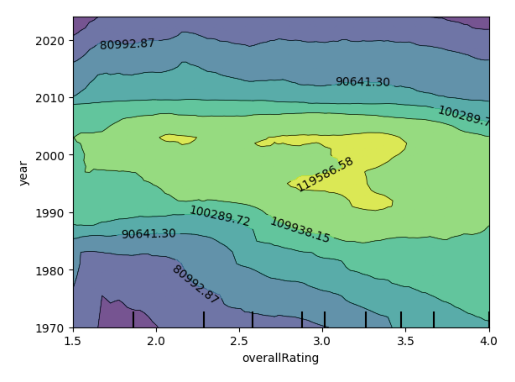

In [ ]:
plt.axis("off")
plt.imshow(mpimg.imread("yearRating.png"))

Although there is no correlation between rating and salary when the data is looked at collectively, rating does have interactions with some other variables. One of the strongest interactions is between rating and year of hire.
Here we can see that professors hired after 2010 typically get paid the same regardless of rating, although the number of years that they've worked at Cal Poly does matter(shown in the horizontal lines). P
rofessors hired between 1990 and 2010 generally get all paid the same, however there does seem to be a clup of highly paid professors with polyratings around 3.
For professors hired before 1990, both rating and year hired affects pay, with professors hired more recently and with higher ratings getting paid more. This can be seen by the diagonal lines in the chart.

# Conclusion

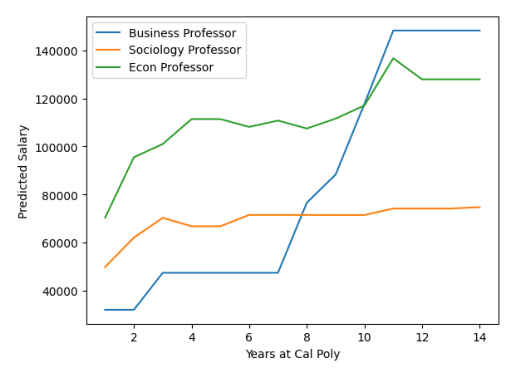

In [ ]:
plt.axis("off")
plt.imshow(mpimg.imread("years.png"))

Using a K-nearest neighbors model, we can predict the salaries of professors in different departments based on how long they've been working at Cal Poly.